# Preprocessing
---

In [1]:
import pandas as pd

In [50]:
# func 모음

# 1. 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    x = str(x)
    return x.rjust(6, "0")

# 2. 결산월 12월인 것만 선택
# : 전체 데이터 4963개 중에서 12월 결산인 데이터가 4836개이다. 나머지 결산월의 데이터가 전체의 2.5%로 데이터량이 작기도하고 결측치가 많아 제거
def func_yearin(x):
    if x[5:7] == '12':
        return True
    else:
        return False

# 3. 회계년도컬럼, 년도만 뽑아서 int화
def change_year(x):
    return int(x[:4])

# 4. 연결, 개별재무지표 통합을 위해 연결재무 데이터 컬럼명 통일화 : "(IFRS연결)"제거
def func_replace_col1(x):
    return x.replace("(IFRS연결)","")

# 5. 연결, 개별재무지표 통합을 위해 개별재무 데이터 컬럼명 통일화 : "(IFRS)"제거
def func_replace_col2(x):
    return x.replace("(IFRS)","")

---
## 주가 상승 확인

In [21]:
# df[df["회사명"]=="LG이노텍(주)"]
# (주)경인양행 2015-2016
# (주)금비 2014-2015
# LG이노텍(주) 2013-2014
# 기간 : 02.01 ~ 03.30

회사명  거래소코드  회계년도  이자보상배율(이자비용)  이자보상배율(순금융비용)
11223  LG이노텍(주)  11070  2011         -0.75  -1.340000e+00
11224  LG이노텍(주)  11070  2012          0.00   4.800000e-01
11225  LG이노텍(주)  11070  2013          0.30   1.400000e-01
11226  LG이노텍(주)  11070  2014          3.34   3.010000e+00
11227  LG이노텍(주)  11070  2015          4.20   2.420000e+00
11228  LG이노텍(주)  11070  2016          2.07   1.380000e+01
11229  LG이노텍(주)  11070  2017          8.86   2.739000e+01
11230  LG이노텍(주)  11070  2018          4.34   1.128000e+01
11231  LG이노텍(주)  11070  2019          6.77   1.000000e+09

In [4]:
df_LG이노텍 = pd.read_csv("./datasets/raw/LG이노텍_20140201_20150331.csv", index_col="날짜")
df_LG이노텍.sort_values(by="날짜", ascending=True, inplace=True)
df_LG이노텍

종가       오픈       고가       저가      거래량    변동 %
날짜                                                               
2014- 02- 03   84,700   83,800   85,000   82,500  127.94K  -0.35%
2014- 02- 04   84,100   82,800   84,600   82,800   84.75K  -0.71%
2014- 02- 05   83,300   84,300   84,800   82,600   80.49K  -0.95%
2014- 02- 06   83,800   83,200   84,900   83,200   80.42K   0.60%
2014- 02- 07   86,500   84,100   86,900   84,100  153.49K   3.22%
...               ...      ...      ...      ...      ...     ...
2015- 03- 25  111,000  115,000  116,000  110,500  173.13K  -3.48%
2015- 03- 26  111,000  109,000  112,000  108,500  144.55K   0.00%
2015- 03- 27  114,500  111,000  115,000  110,500  172.27K   3.15%
2015- 03- 30  115,500  116,000  116,000  114,000  121.44K   0.87%
2015- 03- 31  116,000  115,500  117,500  113,500  246.90K   0.43%

[328 rows x 6 columns]

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_72296/2254020895.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: xlabel='날짜'>

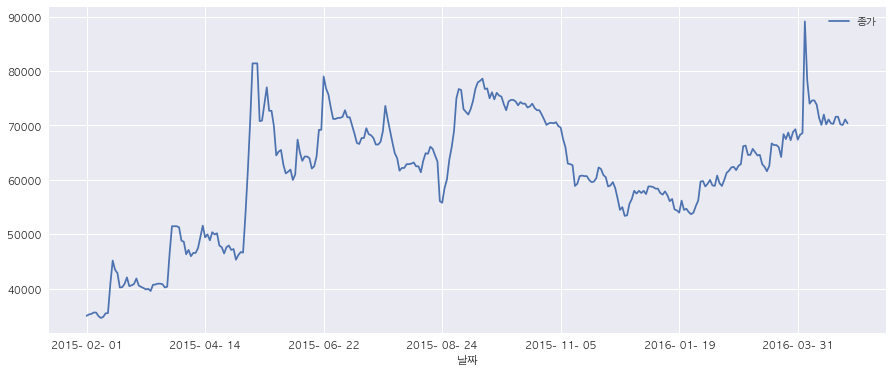

In [45]:
df_금비 = pd.read_csv("./datasets/raw/금비_20150201_20160430.csv", index_col="날짜")
df_금비.sort_values(by="날짜", ascending=True, inplace=True)

def func_replace(x):
    return int(x.replace(",",""))

df_금비["종가"] = df_금비["종가"].map(func_replace)

import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_금비.plot(y = ['종가'], figsize = [15,6], grid = True)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_72296/550950680.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: xlabel='날짜'>

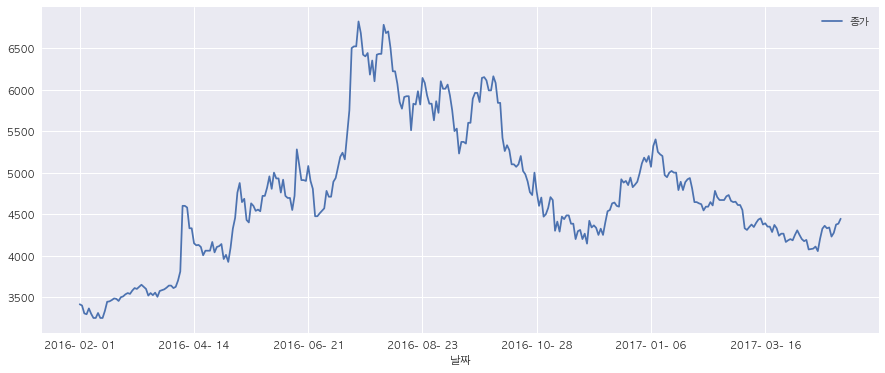

In [46]:
df_경인양행 = pd.read_csv("./datasets/raw/경인양행_20160201_20170430.csv", index_col="날짜")
df_경인양행.sort_values(by="날짜", ascending=True, inplace=True)

def func_replace(x):
    return int(x.replace(",",""))

df_경인양행["종가"] = df_경인양행["종가"].map(func_replace)

import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_경인양행.plot(y = ['종가'], figsize = [15,6], grid = True)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14400/4065861212.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: xlabel='날짜'>

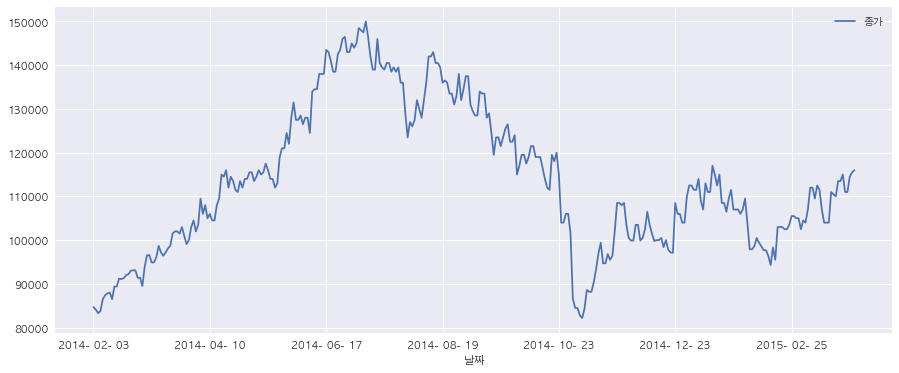

In [19]:
df_LG이노텍 = pd.read_csv("./datasets/raw/LG이노텍_20140201_20150331.csv", index_col="날짜")
df_LG이노텍.sort_values(by="날짜", ascending=True, inplace=True)

def func_replace(x):
    return int(x.replace(",",""))

df_LG이노텍["종가"] = df_LG이노텍["종가"].map(func_replace)

import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_LG이노텍.plot(y = ['종가'], figsize = [15,6], grid = True)

---
## 부실징후기업 전처리

#### 1. 재무데이터 결측치 처리(개별재무재표 데이터로 대체)

In [116]:
df_연결 = pd.read_csv("./datasets/raw/사업보고서_연결.csv", encoding="CP949")
df_연결["거래소코드"] = df_연결["거래소코드"].map(padding)
df_연결 = df_연결[df_연결["회계년도"].map(func_yearin)]
df_연결["회계년도"] = df_연결["회계년도"].map(change_year)


list_col = list() # 컬럼명에서 "IFRS연결" 제거
for i in list(df_연결.columns):
    list_col.append(func_replace_col1(i))
df_연결.columns = list_col
df_연결

회사명   거래소코드  회계년도  총자본증가율  유형자산증가율  비유동생물자산증가율  투자부동산증가율  \
0      (주)CMG제약  058820  2011    1.98    -5.90         0.0      0.00   
1      (주)CMG제약  058820  2012  109.15    -4.12         0.0      0.00   
2      (주)CMG제약  058820  2013   -2.09    16.09         0.0      0.00   
3      (주)CMG제약  058820  2014    3.86    74.30         0.0      0.00   
4      (주)CMG제약  058820  2015   -2.64    -5.37         0.0      0.00   
...         ...     ...   ...     ...      ...         ...       ...   
17822   흥아해운(주)  003280  2015   21.93    49.36         0.0      7.85   
17823   흥아해운(주)  003280  2016   21.08    38.84         0.0      2.88   
17824   흥아해운(주)  003280  2017  -11.43   -16.50         0.0    -11.63   
17825   흥아해운(주)  003280  2018   -5.33   -12.07         0.0     70.56   
17826   흥아해운(주)  003280  2019  -46.38   -51.51         0.0    -97.68   

       비유동자산증가율  유동자산증가율  재고자산증가율  ...  인건비(백만원)  금융비용(백만원)  임차료(백만원)  \
0        -12.89    17.64    -1.43  ...       0.0    1344.09       NaN   
1        -16.43   207.08     7.73  ...       0.0    1404.34       NaN   
2         77.05   -18.89    56.29  ...       0.0    1116.14       NaN   
3         68.15   -25.93     6.37  ...       0.0    1464.84       NaN   
4          1.66    -7.17    11.04  ...       0.0    1890.05       NaN   
...         ...      ...      ...  ...       ...        ...       ...   
17822     32.18   -11.18   -12.92  ...       0.0   18964.51       NaN   
17823     30.68   -25.08    56.39  ...       0.0   25157.71       NaN   
17824    -14.38    13.29    11.18  ...       0.0   27508.83       NaN   
17825     -5.17    -6.33    -5.85  ...       0.0   24326.58       NaN   
17826    -51.51   -13.42   -58.98  ...       0.0   23529.72       NaN   

       세금과공과(백만원)    감가상각비(백만원)  종업원1인당 부가가치(백만원).1  총자본투자효율.1  기계투자효율.1  \
0           12.72  1.285100e+02               19.56        NaN       NaN   
1            0.47  1.067000e+01                1.66        NaN       NaN   
2           12.51  2.894000e+02               34.29        NaN       NaN   
3           12.16  1.320600e+02               31.04        NaN       NaN   
4            7.63  9.092000e+01               15.96        NaN       NaN   
...           ...           ...                 ...        ...       ...   
17822       13.11  3.459744e+09               12.28        NaN       NaN   
17823       10.98  3.509713e+09               12.66        NaN       NaN   
17824        5.43  1.535742e+09                5.51        NaN       NaN   
17825        4.24  1.135163e+09                4.52        NaN       NaN   
17826        3.10  4.455416e+08               13.08        NaN       NaN   

       부가가치율.1  종업원수  
0          NaN   NaN  
1          NaN   NaN  
2          NaN   NaN  
3          NaN   NaN  
4          NaN   NaN  
...        ...   ...  
17822      NaN   NaN  
17823      NaN   NaN  
17824      NaN   NaN  
17825      NaN   NaN  
17826      NaN   NaN  

[17418 rows x 152 columns]

In [117]:
na_1 = int(list(df_연결.isna().sum().to_dict().values()).count(0))
na_2 = int(list(df_연결.isna().sum().to_dict().values()).count(17418))
na_3 = int(list(df_연결.isna().sum().to_dict().values()).count(5421))
print("전체컬럼수 :", len(list(df_연결.isna().sum().to_dict().values())))
print("1) 인덱스컬럼수 : ", na_1)
print("2) 데이터 하나도 없는 컬럼수 : ", na_2)
print("3) 데이터 하나도 없는 행의 컬럼수에서 위 2)번 컬럼수 제외 : ", na_3)
print(" -> 인덱스컬럼을 제외한 모든 컬럼에 결측치 존재")


# df_연결.isna().sum().to_dict()

# 2) 데이터 하나도 없는 컬럼 리스트 : 23개
list_na_col = ['종업원1인당 부가가치증가율', '종업원수증가율', '종업원1인당 매출액증가율', '종업원1인당 인건비증가율', '사내유보율', '사내유보 대 자기자본비율', '평균배당률', '자기자본배당률', '배당성향', '1주당순자산(원)', '운전자본회전률', '1회전기간', '부가가치(백만원)', '종업원1인당 부가가치(백만원)', '종업원1인당 매출액(백만원)', '종업원1인당 정상영업이익(백만원)', '종업원1인당 순이익(백만원)', '종업원1인당 인건비(백만원)', '임차료(백만원)', '총자본투자효율.1', '기계투자효율.1', '부가가치율.1', '종업원수']

전체컬럼수 : 152
1) 인덱스컬럼수 :  3
2) 데이터 하나도 없는 컬럼수 :  23
3) 데이터 하나도 없는 행의 컬럼수에서 위 2)번 컬럼수 제외 :  126
 -> 인덱스컬럼을 제외한 모든 컬럼에 결측치 존재


In [118]:
# 개별재무지표 데이터 불러오기
df_별도 = pd.read_csv("./datasets/raw/사업보고서_별도.csv", encoding="CP949")
df_별도["거래소코드"] = df_별도["거래소코드"].map(padding)
df_별도 = df_별도[df_별도["회계년도"].map(func_yearin)]
df_별도["회계년도"] = df_별도["회계년도"].map(change_year)

list_col = list() # 컬럼명에서 "IFRS연결" 제거
for i in list(df_별도.columns):
    list_col.append(func_replace_col2(i))
df_별도.columns = list_col
list_col_add = ["기업가치(EV)(백만원)","EBITDA(백만원)","EBITDA/매출액(%)","EBITDA/금융비용(배)","EBITDA/평균발행주식수(백만원)","EV/EBITDA(배)"] # 나중에 연결에 추가
# df_별도


In [131]:
# df_연결에서 데이터가 하나도 없는 컬럼을 개별재무데이터로 대체한 "df_재무" 생성
df_재무 = df_연결.copy()
df_재무 = df_재무.drop(list_na_col, axis=1)
df_재무 = pd.merge(df_재무, df_별도[["거래소코드","회계년도"]+list_na_col], on=["거래소코드","회계년도"], how = 'left')
# df_별도 = df_별도.drop(list_na_col, axis=1)
df_재무

회사명   거래소코드  회계년도  총자본증가율  유형자산증가율  비유동생물자산증가율  투자부동산증가율  \
0      (주)CMG제약  058820  2011    1.98    -5.90         0.0      0.00   
1      (주)CMG제약  058820  2012  109.15    -4.12         0.0      0.00   
2      (주)CMG제약  058820  2013   -2.09    16.09         0.0      0.00   
3      (주)CMG제약  058820  2014    3.86    74.30         0.0      0.00   
4      (주)CMG제약  058820  2015   -2.64    -5.37         0.0      0.00   
...         ...     ...   ...     ...      ...         ...       ...   
17413   흥아해운(주)  003280  2015   21.93    49.36         0.0      7.85   
17414   흥아해운(주)  003280  2016   21.08    38.84         0.0      2.88   
17415   흥아해운(주)  003280  2017  -11.43   -16.50         0.0    -11.63   
17416   흥아해운(주)  003280  2018   -5.33   -12.07         0.0     70.56   
17417   흥아해운(주)  003280  2019  -46.38   -51.51         0.0    -97.68   

       비유동자산증가율  유동자산증가율  재고자산증가율  ...  종업원1인당 부가가치(백만원)  종업원1인당 매출액(백만원)  \
0        -12.89    17.64    -1.43  ...             -9.37            23.04   
1        -16.43   207.08     7.73  ...            -51.44            34.91   
2         77.05   -18.89    56.29  ...              2.47            36.55   
3         68.15   -25.93     6.37  ...              1.05            34.15   
4          1.66    -7.17    11.04  ...            -23.39            39.86   
...         ...      ...      ...  ...               ...              ...   
17413     32.18   -11.18   -12.92  ...             10.86            56.61   
17414     30.68   -25.08    56.39  ...            -17.14            53.98   
17415    -14.38    13.29    11.18  ...            -73.74            59.03   
17416     -5.17    -6.33    -5.85  ...           -121.80            69.60   
17417    -51.51   -13.42   -58.98  ...           -155.02            70.60   

       종업원1인당 정상영업이익(백만원)  종업원1인당 순이익(백만원)  종업원1인당 인건비(백만원)  임차료(백만원)  \
0                   71.32            19.75           204.06     27.18   
1                   69.14            18.64           425.29     -0.66   
2                   66.01            17.77           411.48     51.12   
3                  113.90            32.60           354.43     43.08   
4                  114.25            30.43           362.77     27.67   
...                   ...              ...              ...       ...   
17413              589.65             0.00           948.60    108.70   
17414              703.55             0.00          1000.62     86.46   
17415                0.00             0.00             0.00     44.78   
17416                0.00             0.00             0.00      2.41   
17417                0.00             0.00             0.00      9.92   

       총자본투자효율.1   기계투자효율.1   부가가치율.1   종업원수  
0          135.0   37758.74   2055.10  11.58  
1          134.0  102635.81  -2652.62 -16.32  
2          136.0   60446.48   1929.83   9.50  
3          164.0   71714.82   1910.86   8.40  
4          156.0  183741.02   -680.83  -2.52  
...          ...        ...       ...    ...  
17413      813.0  408663.17  34894.23   4.35  
17414      942.0  390735.58  25963.80   3.33  
17415      921.0  353346.82   8543.76   1.09  
17416      796.0  313378.74 -16597.13  -2.35  
17417      339.0  357832.12   6139.30   6.30  

[17418 rows x 152 columns]

In [108]:
def func_not(x):
    return not x
df_재무_완전 = df_재무[df_재무["총자본증가율"].isna().map(func_not)]

In [109]:
df_재무_결측 = df_재무[df_재무["총자본증가율"].isna()]
df_재무_결측

회사명   거래소코드  회계년도  총자본증가율  유형자산증가율  비유동생물자산증가율  투자부동산증가율  \
63     (주)SNT에너지  100840  2011     NaN      NaN         NaN       NaN   
64     (주)SNT에너지  100840  2012     NaN      NaN         NaN       NaN   
65     (주)SNT에너지  100840  2013     NaN      NaN         NaN       NaN   
66     (주)SNT에너지  100840  2014     NaN      NaN         NaN       NaN   
67     (주)SNT에너지  100840  2015     NaN      NaN         NaN       NaN   
...          ...     ...   ...     ...      ...         ...       ...   
17813    흥구석유(주)  024060  2015     NaN      NaN         NaN       NaN   
17814    흥구석유(주)  024060  2016     NaN      NaN         NaN       NaN   
17815    흥구석유(주)  024060  2017     NaN      NaN         NaN       NaN   
17816    흥구석유(주)  024060  2018     NaN      NaN         NaN       NaN   
17817    흥구석유(주)  024060  2019     NaN      NaN         NaN       NaN   

       비유동자산증가율  유동자산증가율  재고자산증가율  ...  인건비(백만원)  금융비용(백만원)  임차료(백만원)  \
63          NaN      NaN      NaN  ...       NaN        NaN   -198.03   
64          NaN      NaN      NaN  ...       NaN        NaN    208.12   
65          NaN      NaN      NaN  ...       NaN        NaN    350.06   
66          NaN      NaN      NaN  ...       NaN        NaN    392.63   
67          NaN      NaN      NaN  ...       NaN        NaN    310.05   
...         ...      ...      ...  ...       ...        ...       ...   
17813       NaN      NaN      NaN  ...       NaN        NaN     90.98   
17814       NaN      NaN      NaN  ...       NaN        NaN     70.72   
17815       NaN      NaN      NaN  ...       NaN        NaN     90.28   
17816       NaN      NaN      NaN  ...       NaN        NaN     65.30   
17817       NaN      NaN      NaN  ...       NaN        NaN     71.99   

       세금과공과(백만원)  감가상각비(백만원)  종업원1인당 부가가치(백만원).1  총자본투자효율.1  기계투자효율.1  \
63            NaN         NaN                 NaN       51.0  92474.31   
64            NaN         NaN                 NaN       53.0  84299.50   
65            NaN         NaN                 NaN       47.0  80103.95   
66            NaN         NaN                 NaN       43.0  62417.53   
67            NaN         NaN                 NaN       48.0  82570.86   
...           ...         ...                 ...        ...       ...   
17813         NaN         NaN                 NaN      263.0  43570.30   
17814         NaN         NaN                 NaN      254.0  57002.60   
17815         NaN         NaN                 NaN      241.0  26755.23   
17816         NaN         NaN                 NaN      212.0  30733.75   
17817         NaN         NaN                 NaN      216.0  36121.31   

        부가가치율.1   종업원수  
63     10500.37  22.68  
64      9574.42  19.55  
65     12227.95  24.27  
66     13045.09  26.68  
67     11801.93  24.45  
...         ...    ...  
17813   4991.84   7.04  
17814   5354.36   6.94  
17815  -1159.95  -2.51  
17816    609.49   0.96  
17817    333.18   0.57  

[5421 rows x 152 columns]

In [114]:
df_별도[df_별도["총자본증가율"].isna().map(func_not)]

회사명   거래소코드  회계년도  총자본증가율  유형자산증가율  비유동생물자산증가율  투자부동산증가율  \
9      (주)CMG제약  058820  2011    2.89    -6.44         0.0      0.00   
10     (주)CMG제약  058820  2012  106.87    -4.02         0.0      0.00   
11     (주)CMG제약  058820  2013   -1.80    16.63         0.0      0.00   
12     (주)CMG제약  058820  2014    3.87    74.30         0.0      0.00   
13     (주)CMG제약  058820  2015   -2.64    -5.37         0.0      0.00   
...         ...     ...   ...     ...      ...         ...       ...   
18427   흥아해운(주)  003280  2015   22.84    49.93         0.0      7.85   
18428   흥아해운(주)  003280  2016   22.22    39.20         0.0      2.88   
18429   흥아해운(주)  003280  2017  -11.51   -16.52         0.0    -11.63   
18430   흥아해운(주)  003280  2018   -6.15   -12.08         0.0     70.56   
18431   흥아해운(주)  003280  2019  -50.62   -51.49         0.0    -97.68   

       비유동자산증가율  유동자산증가율  재고자산증가율  ...  금융비용(백만원)  세금과공과(백만원)  감가상각비(백만원)  \
9        -10.56    17.05    -1.43  ...    1340.15       13.32      137.59   
10       -19.28   208.38     7.73  ...    1392.52       -0.15       -3.53   
11        78.54   -18.73    56.29  ...    1107.28       12.42      287.63   
12        68.15   -25.87     6.37  ...    1464.84       12.15      132.13   
13         1.66    -7.15    11.04  ...    1890.05        7.63       90.95   
...         ...      ...      ...  ...        ...         ...         ...   
18427     33.99   -14.23   -12.92  ...   18635.79       11.46        0.00   
18428     31.68   -26.92    56.39  ...   24809.68        8.64        0.00   
18429    -14.48    16.32    11.18  ...   27192.82        4.94        0.00   
18430     -6.68    -2.49    -5.92  ...   24001.11        0.25        0.00   
18431    -52.12   -40.70   -59.85  ...   20895.47        0.87        0.00   

       종업원1인당 부가가치(백만원).1  기업가치(EV)(백만원)  EBITDA(백만원)  EBITDA/매출액(%)  \
9                   20.67          11.33        47.03          18.37   
10                  -0.54          -4.89       -54.30           0.00   
11                  34.21           1.70        22.28          31.32   
12                  31.05          15.56        22.06          37.53   
13                  15.96          -8.53        -7.71           0.00   
...                   ...            ...          ...            ...   
18427               11.03           1.69       411.91          11.71   
18428               10.44           0.94       267.91          15.05   
18429                5.28           0.28        66.90          41.36   
18430                0.27          -0.51       -97.94           0.00   
18431                3.45           0.24        46.96          58.29   

       EBITDA/금융비용(배)  EBITDA/평균발행주식수(백만원)  EV/EBITDA(배)  
9                 NaN                  NaN           NaN  
10                NaN                  NaN           NaN  
11                NaN                  NaN           NaN  
12                NaN                  NaN           NaN  
13                NaN                  NaN           NaN  
...               ...                  ...           ...  
18427             NaN                  NaN           NaN  
18428             NaN                  NaN           NaN  
18429             NaN                  NaN           NaN  
18430             NaN                  NaN           NaN  
18431             NaN                  NaN           NaN  

[15702 rows x 135 columns]

In [110]:
df_재무_결측.isna().sum()

회사명                      0
거래소코드                    0
회계년도                     0
총자본증가율                5421
유형자산증가율               5421
                      ... 
종업원1인당 부가가치(백만원).1    5421
총자본투자효율.1              776
기계투자효율.1               776
부가가치율.1                776
종업원수                   776
Length: 152, dtype: int64

In [111]:
df_별도

회사명   거래소코드  회계년도  총자본증가율  유형자산증가율  비유동생물자산증가율  투자부동산증가율  \
0      (주)BNK금융지주  138930  2011     NaN      NaN         NaN       NaN   
1      (주)BNK금융지주  138930  2012     NaN      NaN         NaN       NaN   
2      (주)BNK금융지주  138930  2013     NaN      NaN         NaN       NaN   
3      (주)BNK금융지주  138930  2014     NaN      NaN         NaN       NaN   
4      (주)BNK금융지주  138930  2015     NaN      NaN         NaN       NaN   
...           ...     ...   ...     ...      ...         ...       ...   
18427     흥아해운(주)  003280  2015   22.84    49.93         0.0      7.85   
18428     흥아해운(주)  003280  2016   22.22    39.20         0.0      2.88   
18429     흥아해운(주)  003280  2017  -11.51   -16.52         0.0    -11.63   
18430     흥아해운(주)  003280  2018   -6.15   -12.08         0.0     70.56   
18431     흥아해운(주)  003280  2019  -50.62   -51.49         0.0    -97.68   

       비유동자산증가율  유동자산증가율  재고자산증가율  ...  금융비용(백만원)  세금과공과(백만원)  감가상각비(백만원)  \
0           NaN      NaN      NaN  ...        NaN         NaN         NaN   
1           NaN      NaN      NaN  ...        NaN         NaN         NaN   
2           NaN      NaN      NaN  ...        NaN         NaN         NaN   
3           NaN      NaN      NaN  ...        NaN         NaN         NaN   
4           NaN      NaN      NaN  ...        NaN         NaN         NaN   
...         ...      ...      ...  ...        ...         ...         ...   
18427     33.99   -14.23   -12.92  ...   18635.79       11.46         0.0   
18428     31.68   -26.92    56.39  ...   24809.68        8.64         0.0   
18429    -14.48    16.32    11.18  ...   27192.82        4.94         0.0   
18430     -6.68    -2.49    -5.92  ...   24001.11        0.25         0.0   
18431    -52.12   -40.70   -59.85  ...   20895.47        0.87         0.0   

       종업원1인당 부가가치(백만원).1  기업가치(EV)(백만원)  EBITDA(백만원)  EBITDA/매출액(%)  \
0                     NaN            NaN          NaN            NaN   
1                     NaN            NaN          NaN            NaN   
2                     NaN            NaN          NaN            NaN   
3                     NaN            NaN          NaN            NaN   
4                     NaN            NaN          NaN            NaN   
...                   ...            ...          ...            ...   
18427               11.03           1.69       411.91          11.71   
18428               10.44           0.94       267.91          15.05   
18429                5.28           0.28        66.90          41.36   
18430                0.27          -0.51       -97.94           0.00   
18431                3.45           0.24        46.96          58.29   

       EBITDA/금융비용(배)  EBITDA/평균발행주식수(백만원)  EV/EBITDA(배)  
0                 NaN                  NaN           NaN  
1                 NaN                  NaN           NaN  
2                 NaN                  NaN           NaN  
3                 NaN                  NaN           NaN  
4                 NaN                  NaN           NaN  
...               ...                  ...           ...  
18427             NaN                  NaN           NaN  
18428             NaN                  NaN           NaN  
18429             NaN                  NaN           NaN  
18430             NaN                  NaN           NaN  
18431             NaN                  NaN           NaN  

[17859 rows x 135 columns]

### 1. 부실징후기업 Labeling

In [3]:
df = pd.read_csv("./datasets/raw/사업보고서.csv", encoding="CP949")
df["거래소코드"] = df["거래소코드"].map(padding)
df = df[df["회계년도"].map(func_yearin)]
df["회계년도"] = df["회계년도"].map(change_year)
df

회사명   거래소코드  회계년도  총자본증가율(IFRS연결)  유형자산증가율(IFRS연결)  \
0      (주)CMG제약  058820  2011            1.98            -5.90   
1      (주)CMG제약  058820  2012          109.15            -4.12   
2      (주)CMG제약  058820  2013           -2.09            16.09   
3      (주)CMG제약  058820  2014            3.86            74.30   
4      (주)CMG제약  058820  2015           -2.64            -5.37   
...         ...     ...   ...             ...              ...   
17822   흥아해운(주)  003280  2015           21.93            49.36   
17823   흥아해운(주)  003280  2016           21.08            38.84   
17824   흥아해운(주)  003280  2017          -11.43           -16.50   
17825   흥아해운(주)  003280  2018           -5.33           -12.07   
17826   흥아해운(주)  003280  2019          -46.38           -51.51   

       비유동생물자산증가율(IFRS연결)  투자부동산증가율(IFRS연결)  비유동자산증가율(IFRS연결)  \
0                     0.0              0.00            -12.89   
1                     0.0              0.00            -16.43   
2                     0.0              0.00             77.05   
3                     0.0              0.00             68.15   
4                     0.0              0.00              1.66   
...                   ...               ...               ...   
17822                 0.0              7.85             32.18   
17823                 0.0              2.88             30.68   
17824                 0.0            -11.63            -14.38   
17825                 0.0             70.56             -5.17   
17826                 0.0            -97.68            -51.51   

       유동자산증가율(IFRS연결)  재고자산증가율(IFRS연결)  ...  인건비(IFRS연결)(백만원)  \
0                17.64            -1.43  ...               0.0   
1               207.08             7.73  ...               0.0   
2               -18.89            56.29  ...               0.0   
3               -25.93             6.37  ...               0.0   
4                -7.17            11.04  ...               0.0   
...                ...              ...  ...               ...   
17822           -11.18           -12.92  ...               0.0   
17823           -25.08            56.39  ...               0.0   
17824            13.29            11.18  ...               0.0   
17825            -6.33            -5.85  ...               0.0   
17826           -13.42           -58.98  ...               0.0   

       금융비용(IFRS연결)(백만원)  임차료(IFRS연결)(백만원)  세금과공과(IFRS연결)(백만원)  \
0                1344.09               NaN               12.72   
1                1404.34               NaN                0.47   
2                1116.14               NaN               12.51   
3                1464.84               NaN               12.16   
4                1890.05               NaN                7.63   
...                  ...               ...                 ...   
17822           18964.51               NaN               13.11   
17823           25157.71               NaN               10.98   
17824           27508.83               NaN                5.43   
17825           24326.58               NaN                4.24   
17826           23529.72               NaN                3.10   

       감가상각비(IFRS연결)(백만원)  종업원1인당 부가가치(IFRS연결)(백만원).1  총자본투자효율(IFRS연결).1  \
0            1.285100e+02                       19.56                NaN   
1            1.067000e+01                        1.66                NaN   
2            2.894000e+02                       34.29                NaN   
3            1.320600e+02                       31.04                NaN   
4            9.092000e+01                       15.96                NaN   
...                   ...                         ...                ...   
17822        3.459744e+09                       12.28                NaN   
17823        3.509713e+09                       12.66                NaN   
17824        1.535742e+09                        5.51                NaN   
17825        1.135163e+09                        4.52                NaN   
17826        4.4

In [4]:
def func_company_filter(x): # 이자보상배율이 1미만인 데이터가 최소 1개 있는 기업들(부실징후기업대상)
    if x in list_부실징후기업후보:
        return True
    else:
        return False
    
df = df[df["거래소코드"].map(func_company_filter)]
print(df.shape)
list(df["회계년도"].unique())
# df.to_csv("./datasets/data_12월결산+대상기업.csv")

NameError: name 'list_부실징후기업후보' is not defined

In [108]:
df

회사명   거래소코드  회계년도  총자본증가율(IFRS연결)  유형자산증가율(IFRS연결)  \
0              (주)CMG제약  058820  2011            1.98            -5.90   
1              (주)CMG제약  058820  2012          109.15            -4.12   
2              (주)CMG제약  058820  2013           -2.09            16.09   
3              (주)CMG제약  058820  2014            3.86            74.30   
4              (주)CMG제약  058820  2015           -2.64            -5.37   
5              (주)CMG제약  058820  2016           96.31            -5.14   
6              (주)CMG제약  058820  2017           -1.27            -4.28   
7              (주)CMG제약  058820  2018            4.39             6.71   
8              (주)CMG제약  058820  2019           68.07            39.67   
9              (주)DB하이텍  000990  2011          -13.19            -7.89   
10             (주)DB하이텍  000990  2012           -3.44            -9.69   
11             (주)DB하이텍  000990  2013           -8.58            -7.20   
12             (주)DB하이텍  000990  2014           -6.95            -6.96   
13             (주)DB하이텍  000990  2015           -0.02            -9.91   
14             (주)DB하이텍  000990  2016            0.22             2.73   
15             (주)DB하이텍  000990  2017            0.73             1.44   
16             (주)DB하이텍  000990  2018            7.30             7.56   
17             (주)DB하이텍  000990  2019            2.10             3.18   
27             (주)HJ중공업  097230  2011           -6.49            -1.53   
28             (주)HJ중공업  097230  2012           -6.42            -7.72   
29             (주)HJ중공업  097230  2013            1.49            -3.21   
30             (주)HJ중공업  097230  2014           -3.19            -3.73   
31             (주)HJ중공업  097230  2015           -8.59             1.18   
32             (주)HJ중공업  097230  2016          -11.13           -12.12   
33             (주)HJ중공업  097230  2017          -19.97           -25.45   
34             (주)HJ중공업  097230  2018          -35.02           -64.36   
35             (주)HJ중공업  097230  2019           -9.64            -3.70   
81               (주)STX  011810  2011          -14.09           -43.60   
82               (주)STX  011810  2012           -3.19            27.63   
83               (주)STX  011810  2013          -73.50           -79.37   
84               (주)STX  011810  2014           -6.52           -49.85   
85               (주)STX  011810  2015            0.97            -5.90   
86               (주)STX  011810  2016          -44.15           -27.52   
87               (주)STX  011810  2017          -11.33            -4.01   
88               (주)STX  011810  2018          -11.71             4.93   
89               (주)STX  011810  2019            1.09            21.60   
174               (주)경방  000050  2011            1.76             3.05   
175               (주)경방  000050  2012           -1.28             5.06   
176               (주)경방  000050  2013           -2.85            -5.42   
177               (주)경방  000050  2014            0.37             0.44   
178               (주)경방  000050  2015            1.29             5.82   
179               (주)경방  000050  2016           -1.27            -3.15   
180               (주)경방  000050  2017           -2.14            -1.55   
181               (주)경방  000050  2018            2.18            -7.98   
182               (주)경방  000050  2019            5.30           -49.03   
192             (주)경인양행  012610  2011           -0.67             1.15   
193             (주)경인양행  012610  2012          -10.06            -8.87   
194             (주)경인양행  012610  2013           10.26             2.88   
195             (주)경인양행  012610  2014           -1.23             6.18   
196             (주)경인양행  012610  2015            4.36             0.41   
197             (주)경인양행  012610  2016            5.39             1.23   
198             (주)경인양행  012610  2017            3.97             8.64   
199             (주)경인양행  012610  2018           15.38             3.80   
200             (주)경인양행 

In [103]:
# pd.set_option('display.max_rows', None)

In [104]:
df.isna().sum()

회사명                                 0
거래소코드                               0
회계년도                                0
총자본증가율(IFRS연결)                   1299
유형자산증가율(IFRS연결)                  1299
비유동생물자산증가율(IFRS연결)               1299
투자부동산증가율(IFRS연결)                 1299
비유동자산증가율(IFRS연결)                 1299
유동자산증가율(IFRS연결)                  1299
재고자산증가율(IFRS연결)                  1299
자기자본증가율(IFRS연결)                  1299
매출액증가율(IFRS연결)                   1299
정상영업이익증가율(IFRS연결)                1299
순이익증가율(IFRS연결)                   1299
총포괄이익증가율(IFRS연결)                 1299
종업원1인당 부가가치증가율(IFRS연결)           4788
종업원수증가율(IFRS연결)                  4788
종업원1인당 매출액증가율(IFRS연결)            4788
종업원1인당 인건비증가율(IFRS연결)            4788
매출액총이익률(IFRS연결)                  1299
매출액정상영업이익률(IFRS연결)               1299
매출액순이익률(IFRS연결)                  1299
총자본사업이익률(IFRS연결)                 1299
총자본정상영업이익률(IFRS연결)               1299
총자본순이익률(IFRS연결)                  1299
자기자본정상영업이익률(IFRS연결)              1299
자기자본순이익률(IFR

In [99]:
len(list(df[df["총자본증가율(IFRS연결)"].isna()]["회사명"].unique()))

259

In [100]:
df[df["총자본증가율(IFRS연결)"].isna()]

회사명   거래소코드  회계년도  총자본증가율(IFRS연결)  유형자산증가율(IFRS연결)  \
226    (주)골드퍼시픽  038530  2011             NaN              NaN   
227    (주)골드퍼시픽  038530  2012             NaN              NaN   
231    (주)골드퍼시픽  038530  2016             NaN              NaN   
232    (주)골드퍼시픽  038530  2017             NaN              NaN   
234    (주)골드퍼시픽  038530  2019             NaN              NaN   
...         ...     ...   ...             ...              ...   
17709   화성산업(주)  002460  2015             NaN              NaN   
17710   화성산업(주)  002460  2016             NaN              NaN   
17711   화성산업(주)  002460  2017             NaN              NaN   
17712   화성산업(주)  002460  2018             NaN              NaN   
17713   화성산업(주)  002460  2019             NaN              NaN   

       비유동생물자산증가율(IFRS연결)  투자부동산증가율(IFRS연결)  비유동자산증가율(IFRS연결)  \
226                   NaN               NaN               NaN   
227                   NaN               NaN               NaN   
231                   NaN               NaN               NaN   
232                   NaN               NaN               NaN   
234                   NaN               NaN               NaN   
...                   ...               ...               ...   
17709                 NaN               NaN               NaN   
17710                 NaN               NaN               NaN   
17711                 NaN               NaN               NaN   
17712                 NaN               NaN               NaN   
17713                 NaN               NaN               NaN   

       유동자산증가율(IFRS연결)  재고자산증가율(IFRS연결)  ...  인건비(IFRS연결)(백만원)  \
226                NaN              NaN  ...               NaN   
227                NaN              NaN  ...               NaN   
231                NaN              NaN  ...               NaN   
232                NaN              NaN  ...               NaN   
234                NaN              NaN  ...               NaN   
...                ...              ...  ...               ...   
17709              NaN              NaN  ...               NaN   
17710              NaN              NaN  ...               NaN   
17711              NaN              NaN  ...               NaN   
17712              NaN              NaN  ...               NaN   
17713              NaN              NaN  ...               NaN   

       금융비용(IFRS연결)(백만원)  임차료(IFRS연결)(백만원)  세금과공과(IFRS연결)(백만원)  \
226                  NaN               NaN                 NaN   
227                  NaN               NaN                 NaN   
231                  NaN               NaN                 NaN   
232                  NaN               NaN                 NaN   
234                  NaN               NaN                 NaN   
...                  ...               ...                 ...   
17709                NaN               NaN                 NaN   
17710                NaN               NaN                 NaN   
17711                NaN               NaN                 NaN   
17712                NaN               NaN                 NaN   
17713                NaN               NaN                 NaN   

       감가상각비(IFRS연결)(백만원)  종업원1인당 부가가치(IFRS연결)(백만원).1  총자본투자효율(IFRS연결).1  \
226                   NaN                         NaN                NaN   
227                   NaN                         NaN                NaN   
231                   NaN                         NaN                NaN   
232                   NaN                         NaN                NaN   
234                   NaN                         NaN                NaN   
...                   ...                         ...                ...   
17709                 NaN                         NaN                NaN   
17710                 NaN                         NaN                NaN   
17711                 NaN                         NaN                NaN   
17712                 NaN                         NaN                NaN   
17713           

#### 1-1. 이자보상배율 df 생성

In [74]:
df_이자보상배율_9년_10년 = pd.read_csv("./datasets/raw/이자보상배율_9년_10년.csv", encoding="CP949")
df_이자보상배율_9년_10년["거래소코드"] = df_이자보상배율_9년_10년["거래소코드"].map(padding)
df_이자보상배율_9년_10년 = df_이자보상배율_9년_10년[df_이자보상배율_9년_10년["회계년도"].map(func_yearin)]
df_이자보상배율_9년_10년["회계년도"] = df_이자보상배율_9년_10년["회계년도"].map(change_year)
df_이자보상배율_9년_10년 = df_이자보상배율_9년_10년[df_이자보상배율_9년_10년["거래소코드"].map(func_company_filter)]
df_이자보상배율_9년_10년.columns = ['회사명', '거래소코드', '회계년도', '이자보상배율']
df_이자보상배율_9년_10년

회사명   거래소코드  회계년도  이자보상배율
0       (주)CMG제약  058820  2009   -8.29
1       (주)CMG제약  058820  2010   -7.33
2       (주)DB하이텍  000990  2009   -0.76
3       (주)DB하이텍  000990  2010   -2.80
6       (주)HJ중공업  097230  2009    2.57
...          ...     ...   ...     ...
3479  효성아이티엑스(주)  094280  2010    3.29
3484     휴림로봇(주)  090710  2009   -3.04
3485     휴림로봇(주)  090710  2010    3.56
3490     흥아해운(주)  003280  2009   -0.47
3491     흥아해운(주)  003280  2010    1.32

[1033 rows x 4 columns]

In [75]:
df_이자보상배율 = df[["회사명","거래소코드","회계년도","이자보상배율(이자비용)(IFRS연결)"]]
df_이자보상배율.columns = ['회사명', '거래소코드', '회계년도', '이자보상배율']
df_이자보상배율

회사명   거래소코드  회계년도  이자보상배율
0      (주)CMG제약  058820  2011  -13.96
1      (주)CMG제약  058820  2012   -2.49
2      (주)CMG제약  058820  2013   10.17
3      (주)CMG제약  058820  2014    9.80
4      (주)CMG제약  058820  2015    4.70
...         ...     ...   ...     ...
17822   흥아해운(주)  003280  2015   16.85
17823   흥아해운(주)  003280  2016   13.70
17824   흥아해운(주)  003280  2017    6.56
17825   흥아해운(주)  003280  2018   -1.49
17826   흥아해운(주)  003280  2019   -5.52

[4788 rows x 4 columns]

In [76]:
df_이자보상배율 = pd.concat([df_이자보상배율_9년_10년,df_이자보상배율], axis=0)
df_이자보상배율.sort_values(by=["거래소코드","회계년도"],inplace=True)
df_이자보상배율.isna().sum() # 1316행 제거(1305-11~19)
df_이자보상배율.dropna(axis=0, inplace=True)
df_이자보상배율

회사명   거래소코드  회계년도  이자보상배율
3143   케이알모터스(주)  000040  2009   -2.81
3144   케이알모터스(주)  000040  2010    3.74
16202  케이알모터스(주)  000040  2011    6.82
16203  케이알모터스(주)  000040  2012    0.95
16204  케이알모터스(주)  000040  2013   -2.01
...          ...     ...   ...     ...
14232  애머릿지코퍼레이션  900100  2015   22.74
14233  애머릿지코퍼레이션  900100  2016   35.72
14234  애머릿지코퍼레이션  900100  2017   64.40
14235  애머릿지코퍼레이션  900100  2018   64.43
14236  애머릿지코퍼레이션  900100  2019   29.67

[4511 rows x 4 columns]

#### 1-2. 이자보상배율이 1미만인 데이터가 최소 1개 이상 있는 기업들을 대상으로 라벨링

In [77]:
list_부실징후기업후보 = list(df_이자보상배율[df_이자보상배율["이자보상배율"]<1]["거래소코드"].unique())
print(len(list_부실징후기업후보))

542


In [78]:
df_이자보상배율.shape

(4511, 4)

In [79]:
def func_company_filter(x):
    if x in list_부실징후기업후보:
        return True
    else:
        return False
    
df_이자보상배율 = df_이자보상배율[df_이자보상배율["거래소코드"].map(func_company_filter)]
df_이자보상배율

회사명   거래소코드  회계년도  이자보상배율
3143   케이알모터스(주)  000040  2009   -2.81
3144   케이알모터스(주)  000040  2010    3.74
16202  케이알모터스(주)  000040  2011    6.82
16203  케이알모터스(주)  000040  2012    0.95
16204  케이알모터스(주)  000040  2013   -2.01
...          ...     ...   ...     ...
14232  애머릿지코퍼레이션  900100  2015   22.74
14233  애머릿지코퍼레이션  900100  2016   35.72
14234  애머릿지코퍼레이션  900100  2017   64.40
14235  애머릿지코퍼레이션  900100  2018   64.43
14236  애머릿지코퍼레이션  900100  2019   29.67

[4511 rows x 4 columns]

#### 1-2. 이자보상배율 이상치대체
- 999999999 너무 많음
- 이자보상배율이 "영업이익/이자비용"으로 계산되는데 이자비용이 0인 기업은 inf값이 아니라 999999999로 계산된다. -> 대체필요

In [80]:
df_이자보상배율[df_이자보상배율["이자보상배율"]>999999990]

회사명   거래소코드  회계년도       이자보상배율
2115       경인전자(주)  009140  2010  999999999.0
2482      비케이탑스(주)  030790  2009  999999999.0
1821       (주)판타지오  032800  2010  999999999.0
73        (주)그래디언트  035080  2010  999999999.0
2769  에스씨아이평가정보(주)  036120  2009  999999999.0
48        (주)골드퍼시픽  038530  2009  999999999.0
49        (주)골드퍼시픽  038530  2010  999999999.0
3020       인포뱅크(주)  039290  2010  999999999.0
489    (주)블루베리엔에프티  044480  2009  999999999.0
1954      (주)한빛소프트  047080  2009  999999999.0
2256      대원미디어(주)  048910  2009  999999999.0
1126        (주)오비고  352910  2010  999999999.0

In [81]:
# winsorizing을 이용한 이상치 대체 방법
from scipy.stats.mstats import winsorize
퍼센트=0.01 # 위아래 각각 0.5%씩 대체
df_이자보상배율["이자보상배율"] = winsorize(df_이자보상배율["이자보상배율"], limits=[퍼센트/2, 퍼센트/2])

In [87]:
df_이자보상배율.sort_values(by="이자보상배율", ascending=False).head(5)

회사명   거래소코드  회계년도  이자보상배율
14753      에이피티씨(주)  089970  2019  102.51
13406         샘표(주)  007540  2016  102.51
2769   에스씨아이평가정보(주)  036120  2009  102.51
2115        경인전자(주)  009140  2010  102.51
48         (주)골드퍼시픽  038530  2009  102.51

In [82]:
# 이상치 확인을 위한 boxplot 그리기 전 초기작업
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_85398/289675185.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


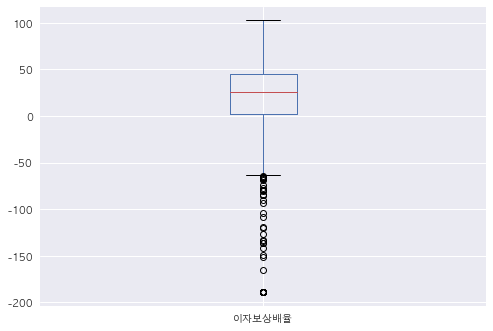

In [83]:
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_이자보상배율[["이자보상배율"]].boxplot()
    
plt.show()

<AxesSubplot: xlabel='이자보상배율'>

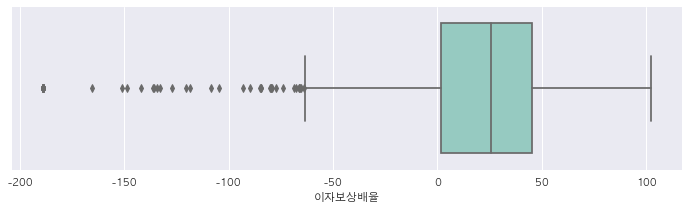

In [85]:
# 이상치 확인
import seaborn as sns
target = "이자보상배율"

plt.figure(figsize=(12,3))
sns.boxplot(x=target, data=df_이자보상배율, palette="Set3")
# sns.swarmplot(data=df_이자보상배율, x=target)

#### 1-3. 부실징후기업 Labeling

In [91]:
df_이자보상배율

회사명   거래소코드  회계년도  이자보상배율
3143   케이알모터스(주)  000040  2009   -2.81
3144   케이알모터스(주)  000040  2010    3.74
16202  케이알모터스(주)  000040  2011    6.82
16203  케이알모터스(주)  000040  2012    0.95
16204  케이알모터스(주)  000040  2013   -2.01
...          ...     ...   ...     ...
14232  애머릿지코퍼레이션  900100  2015   22.74
14233  애머릿지코퍼레이션  900100  2016   35.72
14234  애머릿지코퍼레이션  900100  2017   64.40
14235  애머릿지코퍼레이션  900100  2018   64.43
14236  애머릿지코퍼레이션  900100  2019   29.67

[4511 rows x 4 columns]